In [55]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Importar nuestro archivo de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append('..') #pongo los 2 puntos para que salga de la carpeta
from src import soporte_clustering as sc
from src import funciones as f
from src import soporte_prep as spp
from src import soporte_encoding as se
# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import math

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
df = pd.read_csv('../Datos/Global_Superstore.csv', encoding='latin')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,"10,024.00",US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.00,311.52,903.04,Critical


In [57]:
df[df['Order ID'] == 'CA-2014-100111']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1273,37396,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Sta...,"2,888.13",11,0.10,609.72,177.06,Medium
1303,37398,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,FUR-CH-10001215,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,"2,254.41",5,0.10,375.74,175.20,Medium
6388,37397,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,TEC-PH-10002885,Technology,Phones,Apple iPhone 5,"1,299.66",2,0.00,350.91,53.23,Medium
11080,37387,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.65,3,0.10,18.18,29.25,Medium
17550,37388,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,TEC-AC-10002647,Technology,Accessories,Logitech Wireless Boombox Speaker - portable -...,212.80,2,0.00,95.76,15.57,Medium
24942,37399,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,104.85,3,0.00,28.31,8.25,Medium
25669,37393,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.99,1,0.10,8.10,7.78,Medium
35563,37400,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,TEC-AC-10001998,Technology,Accessories,Logitech LS21 Speaker System - PC Multimedia -...,59.97,3,0.00,20.39,3.42,Medium
39006,37390,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.64,2,0.00,21.79,2.48,Medium
41571,37391,CA-2014-100111,21-09-2014,27-09-2014,Standard Class,SV-20365,Seth Vernon,Consumer,New York City,New York,United States,"10,035.00",US,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",45.40,4,0.00,12.71,1.91,Medium


In [58]:
preprocesar = sc.Exploracion(df)
preprocesar.explorar_datos()

5 registros aleatorios:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
35978,47436,AG-2014-2600,18-11-2014,20-11-2014,Second Class,DR-2940,Daniel Raglin,Home Office,Algiers,Alger,Algeria,NaN,Africa,Africa,OFF-SAN-10001326,Office Supplies,Paper,"SanDisk Note Cards, 8.5 x 11",29.73,1,0.00,7.71,3.30,Medium
17503,16855,ES-2013-4241023,03-02-2013,03-02-2013,Same Day,CK-12325,Christine Kargatis,Home Office,Alfortville,Ile-de-France,France,NaN,EU,Central,OFF-PA-10003868,Office Supplies,Paper,"SanDisk Cards & Envelopes, Recycled",338.31,7,0.00,13.44,15.63,Medium
6149,19724,ES-2013-3042034,23-02-2013,26-02-2013,First Class,PJ-18835,Patrick Jones,Corporate,Florence,Tuscany,Italy,NaN,EU,South,TEC-PH-10003713,Technology,Phones,"Cisco Audio Dock, Cordless",221.90,2,0.40,-99.88,55.02,Critical
5307,8323,MX-2014-119508,16-08-2014,21-08-2014,Standard Class,BS-11665,Brian Stugart,Consumer,Sapucaia do Sul,Rio Grande do Sul,Brazil,NaN,LATAM,South,FUR-BO-10004441,Furniture,Bookcases,"Ikea Library with Doors, Metal",725.70,3,0.00,94.32,62.87,Medium
25049,31194,IN-2011-83513,25-12-2011,28-12-2011,Second Class,PO-18850,Patrick O'Brill,Consumer,Auckland,Auckland,New Zealand,NaN,APAC,Oceania,OFF-SU-10002363,Office Supplies,Supplies,"Fiskars Letter Opener, Easy Grip",70.92,4,0.40,1.08,8.19,Medium




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 

,count,mean,std,min,25%,50%,75%,max
Row ID,"51,290.00","25,645.50","14,806.29",1.00,"12,823.25","25,645.50","38,467.75","51,290.00"
Postal Code,"9,994.00","55,190.38","32,063.69","1,040.00","23,223.00","56,430.50","90,008.00","99,301.00"
Sales,"51,290.00",246.49,487.57,0.44,30.76,85.05,251.05,"22,638.48"
Quantity,"51,290.00",3.48,2.28,1.00,2.00,3.00,5.00,14.00
Discount,"51,290.00",0.14,0.21,0.00,0.00,0.00,0.20,0.85
Profit,"51,290.00",28.61,174.34,"-6,599.98",0.00,9.24,36.81,"8,399.98"
Shipping Cost,"51,290.00",26.38,57.30,0.00,2.61,7.79,24.45,933.57




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994




Número de valores nulos por columna:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Distribución de valores categóricos:

Columna: Order ID
Order ID
CA-2014-100111    14
NI-2014-8880      13
TO-2014-9950      13
IN-2012-41261     13
IN-2013-42311     13
                  ..
ID-2014-68085      1
ID-2012-85221      1
CA-2012-119697     1
CA-2011-151967     1
MX-2012-134460     1
Name: count, Length: 25035, dtype: int64

Columna: Order Date
Order Date
1

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.00,0.01,-0.04,-0.17,0.09,-0.02,-0.04
Postal Code,0.01,1.00,-0.02,0.01,0.06,-0.03,-0.03
Sales,-0.04,-0.02,1.00,0.31,-0.09,0.48,0.77
Quantity,-0.17,0.01,0.31,1.00,-0.02,0.10,0.27
Discount,0.09,0.06,-0.09,-0.02,1.00,-0.32,-0.08
Profit,-0.02,-0.03,0.48,0.10,-0.32,1.00,0.35
Shipping Cost,-0.04,-0.03,0.77,0.27,-0.08,0.35,1.00


## EDA

Observaciones:
- Tenemos nulos solamente en una columna (Postal Code)
- No tenemos duplicados
- No hay muchas correlaciones evidentes entre las columnas numéricas pero sí se observa:
    ** Sales-Shipping Cost (0.76)**
    **  Profit-Sales (0.48) **


In [59]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [60]:
df.drop(columns=['Postal Code', 'Row ID', 'Product ID', 'Customer ID'], inplace=True)

Me he cargado la columna de código postal porque es la única que tiene nulos, además de que tiene una gran cantidad de nulos.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Segment         51290 non-null  object 
 6   City            51290 non-null  object 
 7   State           51290 non-null  object 
 8   Country         51290 non-null  object 
 9   Market          51290 non-null  object 
 10  Region          51290 non-null  object 
 11  Category        51290 non-null  object 
 12  Sub-Category    51290 non-null  object 
 13  Product Name    51290 non-null  object 
 14  Sales           51290 non-null  float64
 15  Quantity        51290 non-null  int64  
 16  Discount        51290 non-null  float64
 17  Profit          51290 non-null 

In [76]:
df[df['Customer Name'] == 'Aaron Bergman']['Country'].value_counts()

Country
Australia         10
Italy              7
Germany            6
Indonesia          6
India              6
Thailand           6
United States      6
France             5
United Kingdom     4
Ukraine            4
Zambia             4
Mexico             3
Vietnam            3
Brazil             3
Iran               2
Cameroon           2
Guatemala          2
China              2
Netherlands        2
Nicaragua          2
El Salvador        2
Argentina          2
Name: count, dtype: int64

In [74]:
df.groupby(['Customer Name', 'Country'])['Country'].count()

Customer Name       Country      
Aaron Bergman       Argentina         2
                    Australia        10
                    Brazil            3
                    Cameroon          2
                    China             2
                                     ..
Zuschuss Donatelli  Saudi Arabia      2
                    Senegal           5
                    Turkey            1
                    Ukraine           1
                    United States     9
Name: Country, Length: 15700, dtype: int64

In [69]:
df.groupby('Customer Name')['Quantity'].sum()

Customer Name
Aaron Bergman         301
Aaron Hawkins         231
Aaron Smayling        211
Adam Bellavance       262
Adam Hart             293
                     ... 
Xylona Preis          213
Yana Sorensen         215
Yoseph Carroll        203
Zuschuss Carroll      334
Zuschuss Donatelli    174
Name: Quantity, Length: 795, dtype: int64

In [62]:
df.groupby('Customer Name')['Sales'].sum()

Customer Name
Aaron Bergman        24,644.63
Aaron Hawkins        20,759.51
Aaron Smayling       14,212.63
Adam Bellavance      20,186.78
Adam Hart            21,718.20
                        ...   
Xylona Preis         12,198.95
Yana Sorensen        20,032.44
Yoseph Carroll       20,164.38
Zuschuss Carroll     28,479.99
Zuschuss Donatelli   12,430.57
Name: Sales, Length: 795, dtype: float64

In [63]:
df.groupby('Customer Name')['Discount'].mean()

Customer Name
Aaron Bergman        0.11
Aaron Hawkins        0.16
Aaron Smayling       0.17
Adam Bellavance      0.13
Adam Hart            0.09
                     ... 
Xylona Preis         0.08
Yana Sorensen        0.07
Yoseph Carroll       0.07
Zuschuss Carroll     0.22
Zuschuss Donatelli   0.12
Name: Discount, Length: 795, dtype: float64

In [78]:
df.groupby("Customer Name")[["Discount","Profit"]].agg(["mean","sum"])

Discount       Profit         
                       mean   sum   mean      sum
Customer Name                                    
Aaron Bergman          0.11  9.80  52.62 4,683.21
Aaron Hawkins          0.16  9.01  43.77 2,450.93
Aaron Smayling         0.17 10.06   6.15   369.16
Adam Bellavance        0.13  8.96  73.23 4,979.98
Adam Hart              0.09  7.83  22.64 1,902.03
...                     ...   ...    ...      ...
Xylona Preis           0.08  5.17  21.39 1,304.72
Yana Sorensen          0.07  4.40  55.65 3,450.41
Yoseph Carroll         0.07  3.92  77.63 4,347.18
Zuschuss Carroll       0.22 18.81   5.14   436.94
Zuschuss Donatelli     0.12  6.25   3.74   201.74

[795 rows x 4 columns]

In [82]:
df.groupby("Customer Name")[["Discount","Sales"]].agg({"Discount":"mean","Sales":"sum"})

,Discount,Sales
Customer Name,,
Aaron Bergman,0.11,"24,644.63"
Aaron Hawkins,0.16,"20,759.51"
Aaron Smayling,0.17,"14,212.63"
Adam Bellavance,0.13,"20,186.78"
Adam Hart,0.09,"21,718.20"
...,...,...
Xylona Preis,0.08,"12,198.95"
Yana Sorensen,0.07,"20,032.44"
Yoseph Carroll,0.07,"20,164.38"


In [86]:
df.groupby("Customer Name")[["Discount","Sales", "Category"]].agg(discount_mean=("Discount","mean"),sales_sum=("Sales","sum"),sales_mean=("Sales","mean"),category_count=('Category', 'nunique'))

,discount_mean,sales_sum,sales_mean,category_count
Customer Name,,,,
Aaron Bergman,0.11,"24,644.63",276.91,3
Aaron Hawkins,0.16,"20,759.51",370.71,3
Aaron Smayling,0.17,"14,212.63",236.88,3
Adam Bellavance,0.13,"20,186.78",296.86,3
Adam Hart,0.09,"21,718.20",258.55,3
...,...,...,...,...
Xylona Preis,0.08,"12,198.95",199.98,3
Yana Sorensen,0.07,"20,032.44",323.10,3
Yoseph Carroll,0.07,"20,164.38",360.08,3


In [64]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,31-07-2012,31-07-2012,Same Day,Rick Hansen,Consumer,New York City,New York,United States,US,East,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",7,0.00,762.18,933.57,Critical
1,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",9,0.10,-288.76,923.63,Critical
2,IN-2013-71249,17-10-2013,18-10-2013,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.10,919.97,915.49,Medium
3,ES-2013-1579342,28-01-2013,30-01-2013,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.10,-96.54,910.16,Medium
4,SG-2013-4320,05-11-2013,06-11-2013,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.00,311.52,903.04,Critical


### Conociendo mis datos

In [65]:
df.groupby(['Market', 'Region'])['Region'].count()

Market  Region        
APAC    Central Asia      2048
        North Asia        2338
        Oceania           3487
        Southeast Asia    3129
Africa  Africa            4587
Canada  Canada             384
EMEA    EMEA              5029
EU      Central           5822
        North             2141
        South             2037
LATAM   Caribbean         1690
        Central           2972
        North             2644
        South             2988
US      Central           2323
        East              2848
        South             1620
        West              3203
Name: Region, dtype: int64

De esta forma puedo conocer las regiones de mis mercados, para conocer exactamente lo que se mueve allí y el contenido de este. De igual forma, poder investigar las regiones dentro de cada una y los países.

In [66]:
pd.options.display.float_format = '{:,.2f}'.format

In [67]:
df.groupby('Market')['Sales'].sum()

Market
APAC     3,585,744.13
Africa     783,773.21
Canada      66,928.17
EMEA       806,161.31
EU       2,938,089.06
LATAM    2,164,605.17
US       2,297,200.86
Name: Sales, dtype: float64

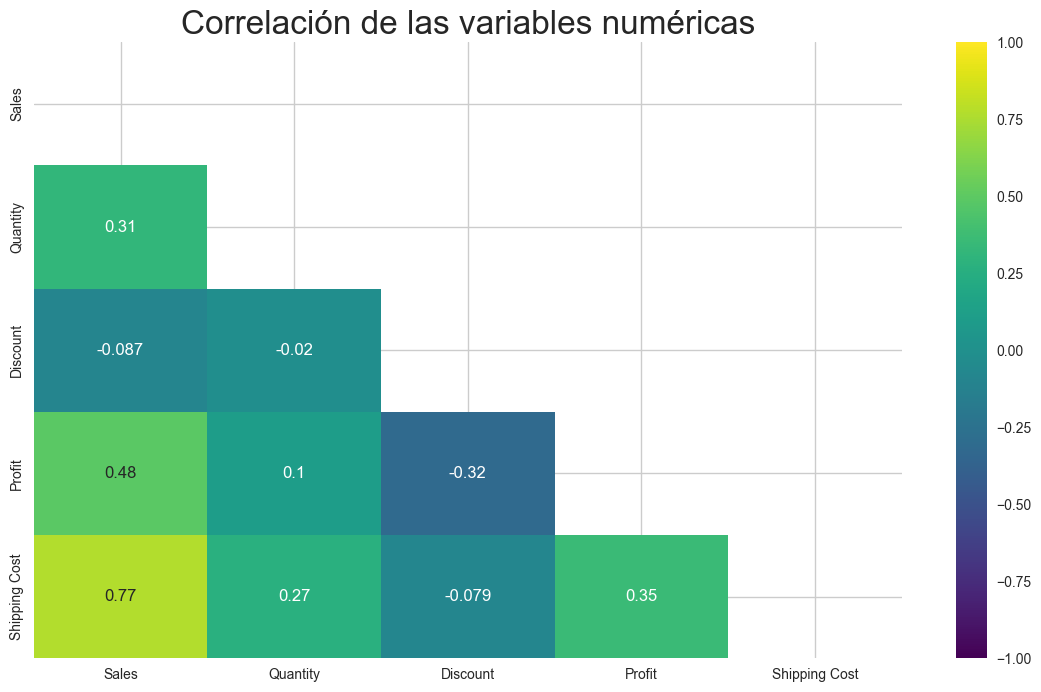

In [68]:
preprocesar.correlacion()

In [ ]:
pausa

Dos cosas importantes visualizadas: profit-sales, en 0.48% Y tener sales-shipping cost

In [41]:
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

df['Discount_Category'] = pd.cut(
    df['Discount'],
    bins=[-float('inf'), 0.250, 0.500, 0.750, float('inf')],  # Límites de las categorías
    labels=['< 0.250', '0.250 - 0.500', '0.500 - 0.750', '> 0.750']  # Nombres de las categorías
)

print(df[['Discount', 'Discount_Category']])

       Discount Discount_Category
0          0.00           < 0.250
1          0.10           < 0.250
2          0.10           < 0.250
3          0.10           < 0.250
4          0.00           < 0.250
...         ...               ...
51285      0.00           < 0.250
51286      0.80           > 0.750
51287      0.00           < 0.250
51288      0.00           < 0.250
51289      0.00           < 0.250

[51290 rows x 2 columns]


In [42]:
df['Quantity_Group'] = pd.cut(
    df['Quantity'],
    bins=[-float('inf'), 5, 10, 15],  # Límites de los grupos
    labels=['<= 5', '6 - 10', '11 - 15']  # Nombres de los grupos
)

# Ver los resultados
print(df[['Quantity', 'Quantity_Group']].head())


   Quantity Quantity_Group
0         7         6 - 10
1         9         6 - 10
2         9         6 - 10
3         5           <= 5
4         8         6 - 10


Convierto a categóricas las columnas de Quantity para hacer más fácil la categorización de las mismas.

In [43]:
df.drop(columns=['Discount', 'Quantity'], inplace=True)

## Clusterizado

In [77]:
df_cluster = df[['Customer Name', 'Quantity_Group','Sales', 'Discount_Category', 'Shipping Cost', 'Segment', 'Country', 'Market', 'Category', 'Order Priority', 'Sub-Category', ]]

KeyError: "['Quantity_Group', 'Discount_Category'] not in index"

borrar las columnas demográficas

In [45]:
df_cluster['Discount_Category'].value_counts(normalize=True)* 100

Discount_Category
< 0.250         78.38
0.250 - 0.500   13.49
0.500 - 0.750    7.51
> 0.750          0.62
Name: proportion, dtype: float64

Los descuentos se agrupan por debajo del 25% cerca del 80% de los pedidos.

In [46]:
df_cluster['Quantity_Group'].value_counts(normalize=True)*100

Quantity_Group
<= 5      83.17
6 - 10    15.65
11 - 15    1.17
Name: proportion, dtype: float64

La cantidad de artículos, se agrupan en un 83% para menos de 5 artículos.

In [47]:
preprocesar_cluster = sc.Exploracion(df_cluster)

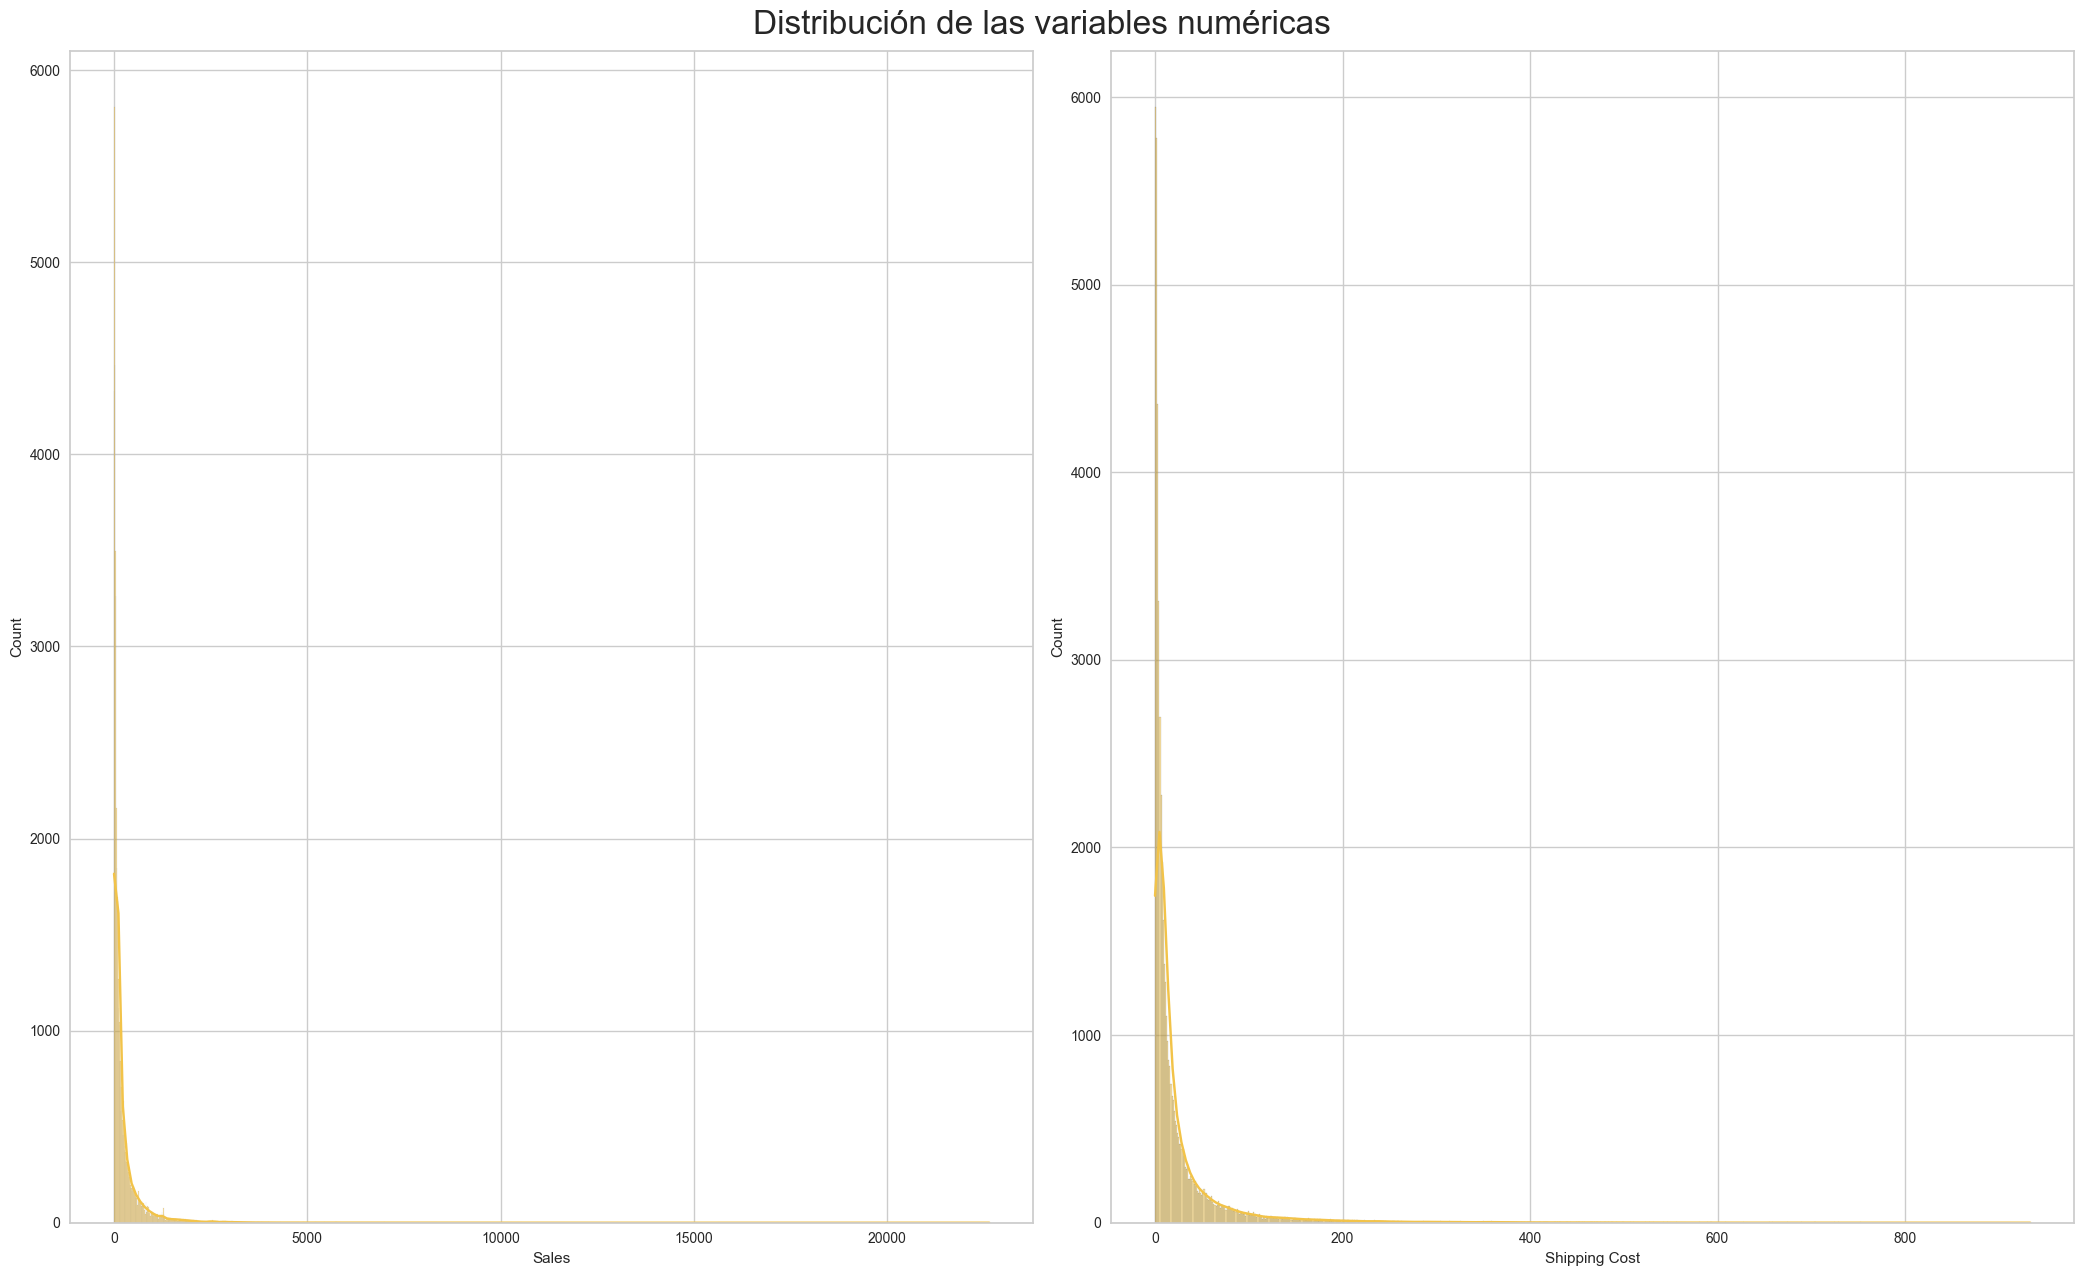

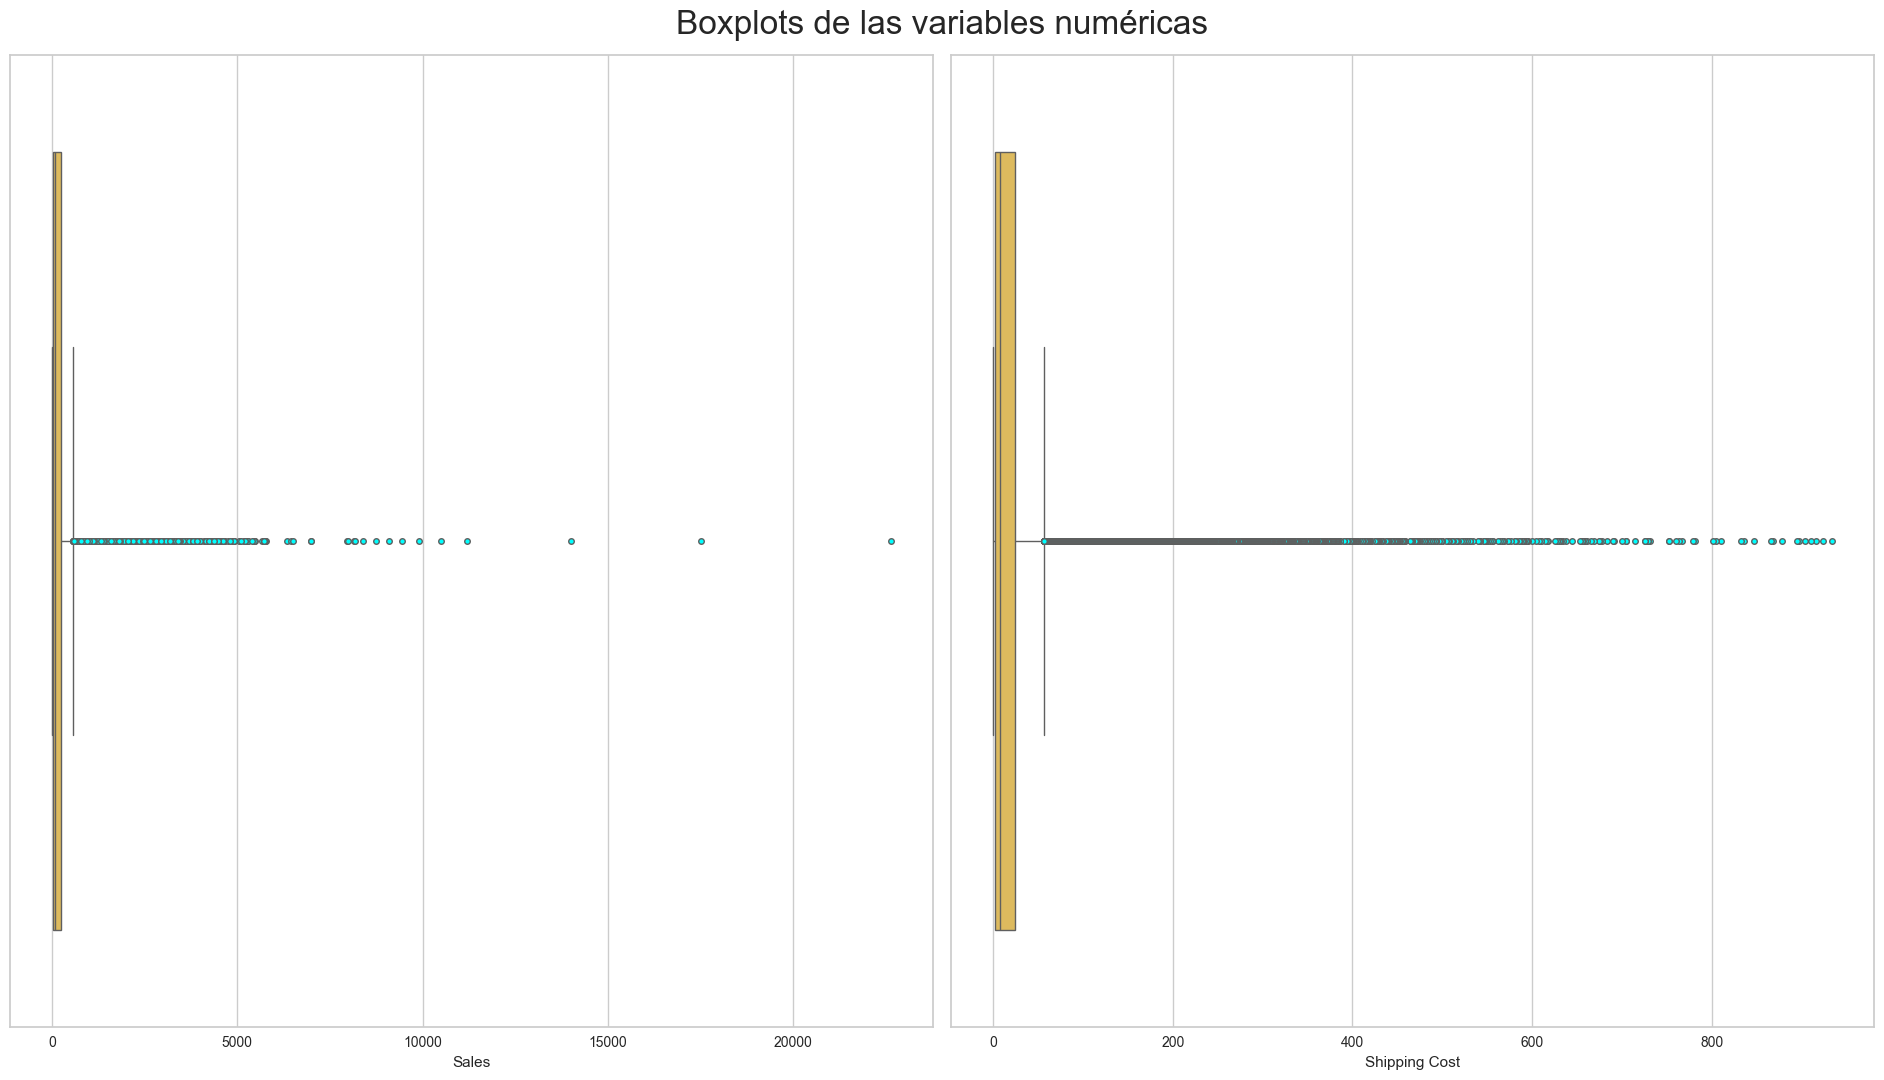

In [48]:
preprocesar_cluster.visualizar_numericas()

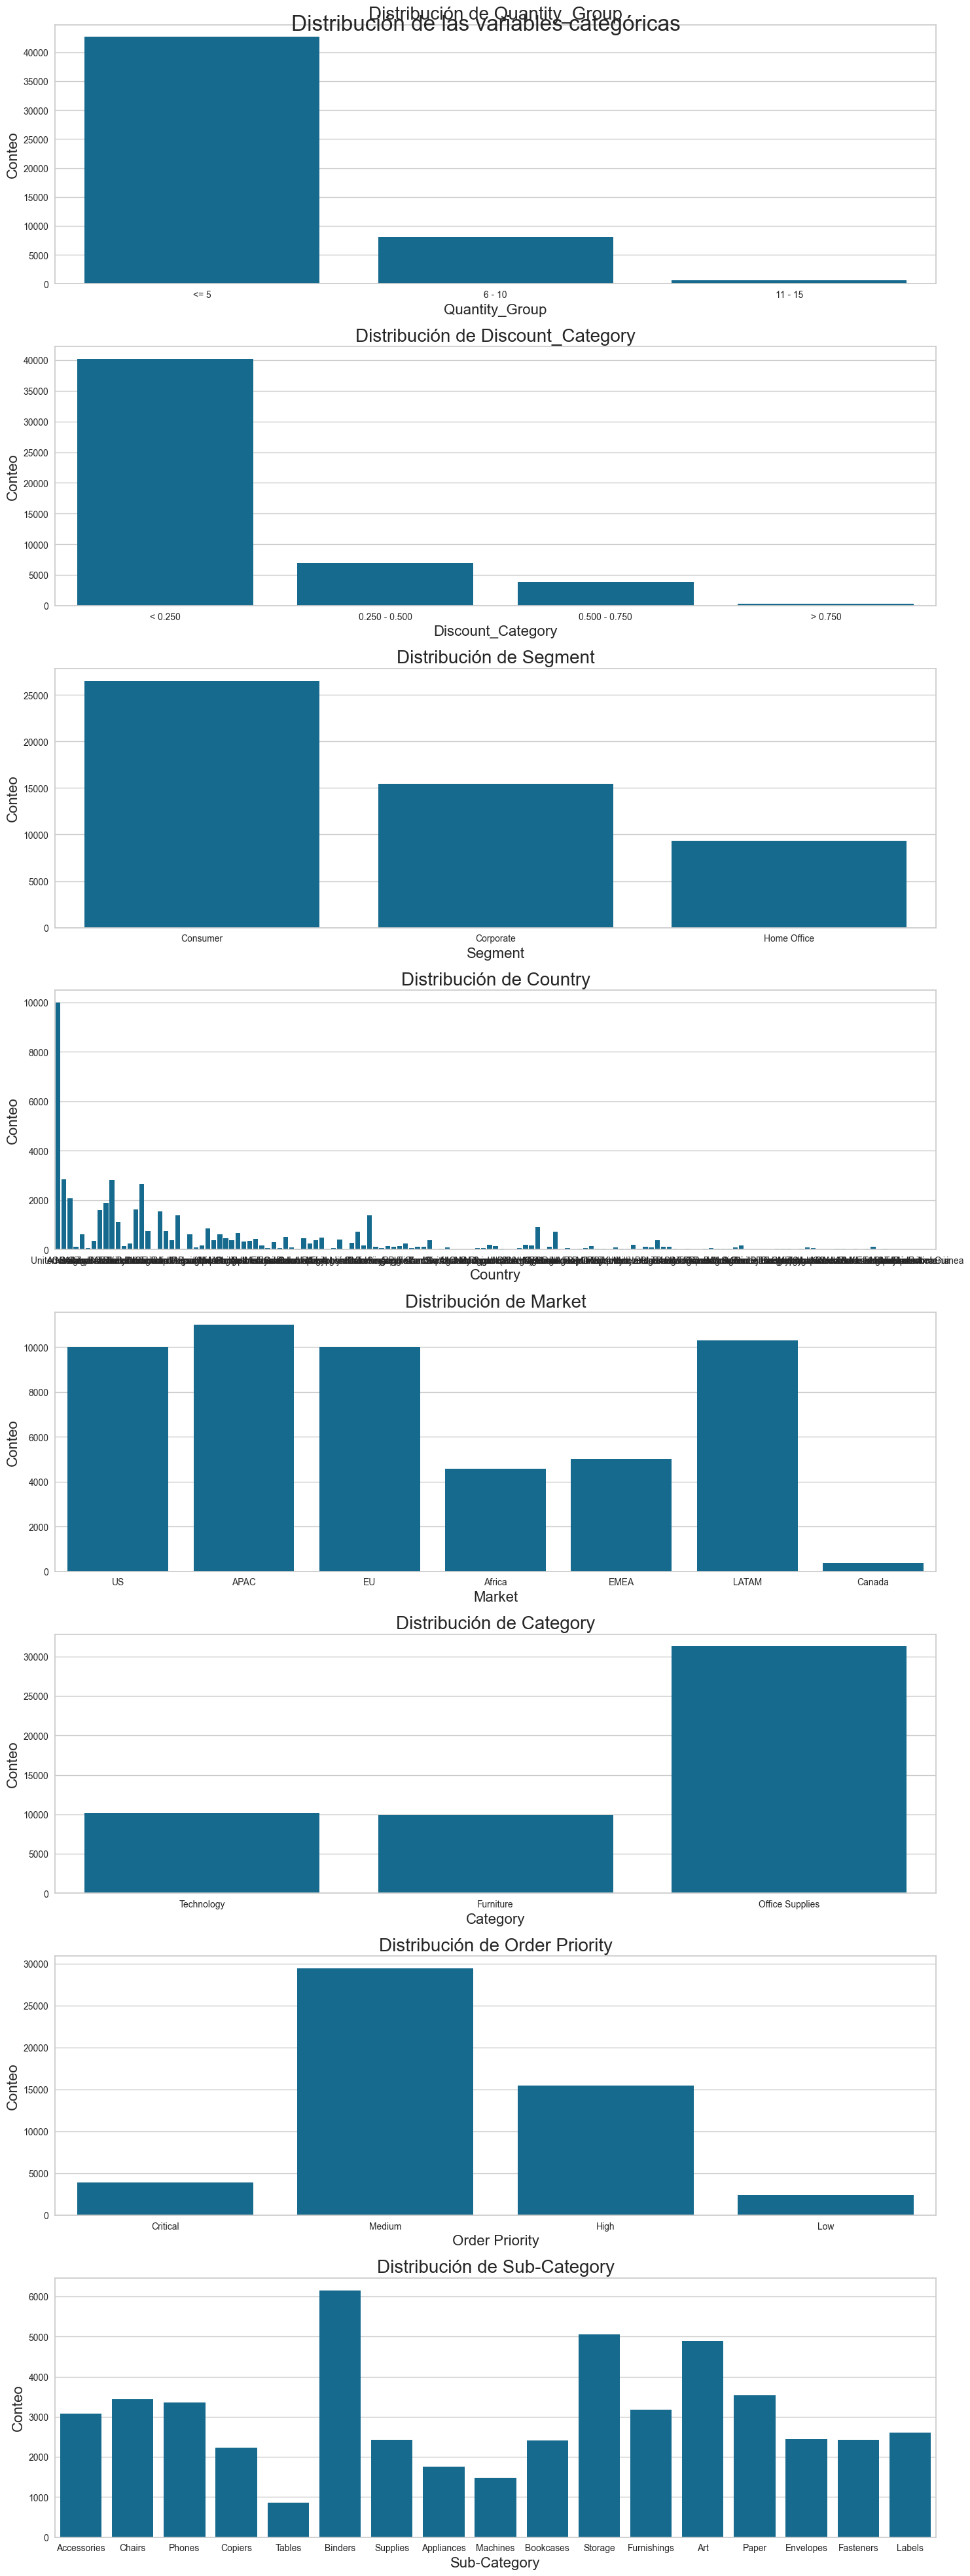

In [49]:
preprocesar_cluster.visualizar_categoricas()

In [50]:
visuales = spp.Visualizador(df_cluster)

In [51]:
df_cluster.head()

,Quantity_Group,Sales,Discount_Category,Shipping Cost,Segment,Country,Market,Category,Order Priority,Sub-Category
0,6 - 10,"2,309.65",< 0.250,933.57,Consumer,United States,US,Technology,Critical,Accessories
1,6 - 10,"3,709.39",< 0.250,923.63,Corporate,Australia,APAC,Furniture,Critical,Chairs
2,6 - 10,"5,175.17",< 0.250,915.49,Consumer,Australia,APAC,Technology,Medium,Phones
3,<= 5,"2,892.51",< 0.250,910.16,Home Office,Germany,EU,Technology,Medium,Phones
4,6 - 10,"2,832.96",< 0.250,903.04,Consumer,Senegal,Africa,Technology,Critical,Copiers


## Escalar numéricas

In [52]:
lista_col_num = df_cluster.select_dtypes(include=[int, float]).columns.tolist()

## Estandarizar categóricas